In [7]:
import dagu
import numpy as np
N = 100
n_samples = 1000
thr = .2
verb = True
data_p = {
    'n_nodes': N,
    'graph_type': 'ER',
    'edges': 4*N,
    'edge_type': 'positive',
    'w_range': ((0.5, 1.5),(-2.0, -0.5)),
    'var': 1,   
}
# Simulate the DAG and the parameters
B_true = dagu.simulate_dag(d=data_p['n_nodes'], s0=data_p['edges'], graph_type=data_p['graph_type'])
W_true, Theta_true = dagu.simulate_parameter(B_true, w_ranges=data_p['w_range'])
X = dagu.simulate_linear_sem(W_true, n_samples, sem_type='gauss', noise_scale=data_p['var'])

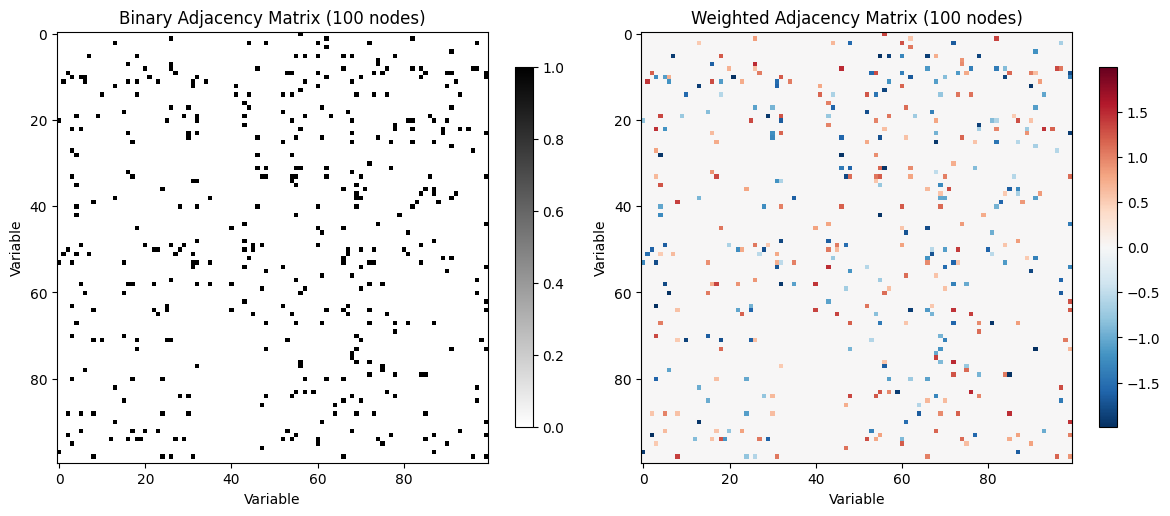

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# Plot B_true and W_true in heatmap fashion
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot B_true (binary adjacency matrix)
im1 = axes[0].imshow(B_true, cmap='binary')
axes[0].set_title(f'Binary Adjacency Matrix ({N} nodes)', fontsize=12)
axes[0].set_xlabel('Variable', fontsize=10)
axes[0].set_ylabel('Variable', fontsize=10)
plt.colorbar(im1, ax=axes[0], shrink=0.8)

# Plot W_true (weighted adjacency matrix) 
vmax = np.max(np.abs(W_true))
im2 = axes[1].imshow(W_true, cmap='RdBu_r', vmin=-vmax, vmax=vmax)
axes[1].set_title(f'Weighted Adjacency Matrix ({N} nodes)', fontsize=12)
axes[1].set_xlabel('Variable', fontsize=10)
axes[1].set_ylabel('Variable', fontsize=10)
plt.colorbar(im2, ax=axes[1], shrink=0.8)

plt.tight_layout()
plt.show()


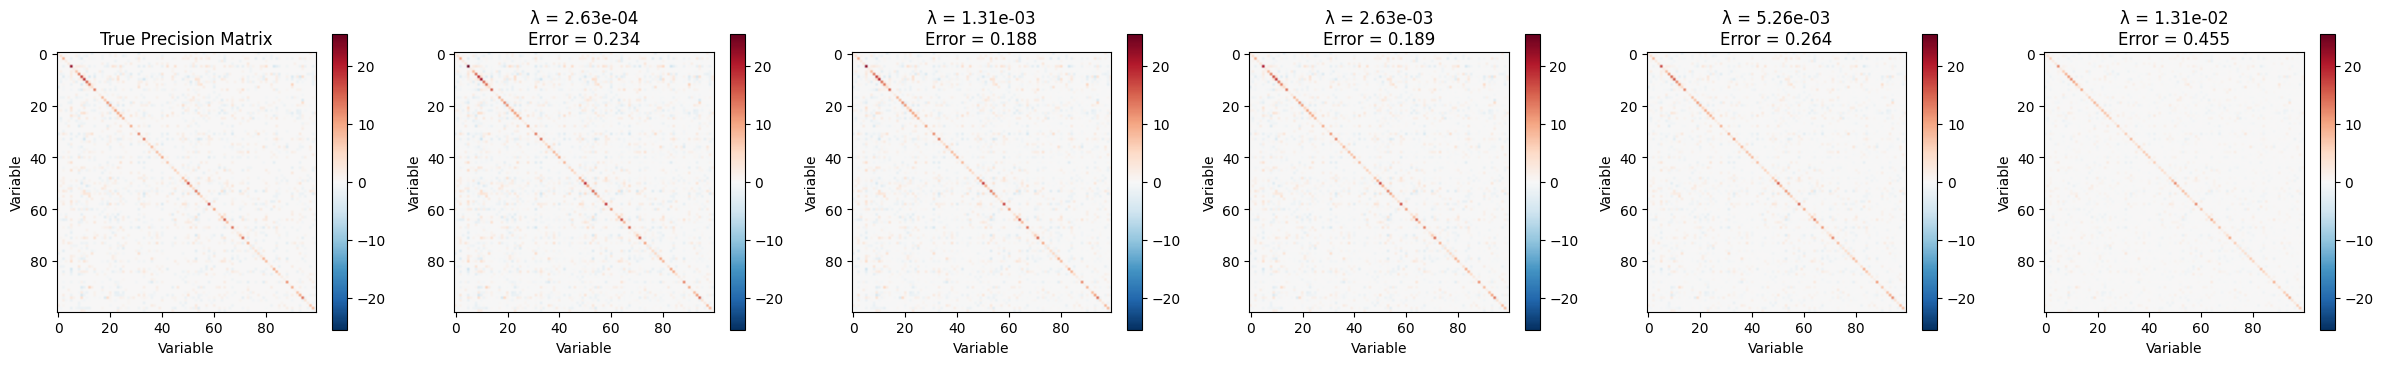

In [ ]:
from Graphical_Lasso_impl import org_graphical_lasso
import numpy as np
import matplotlib.pyplot as plt
from utils import compute_lambda

# Compute sample covariance matrix
S = np.cov(X.T, bias=True)
# Calculate different lambda values
lambda_base = compute_lambda(N, n_samples)
lambdas = [lambda_base * factor for factor in [0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0]]

# Run graphical lasso for each lambda
estimated_Thetas = []
for lam in lambdas:
    theta = org_graphical_lasso(S, lam, max_iter=2000, tol=1e-4)
    estimated_Thetas.append(theta)

# Plot true vs estimated precision matrices
n_plots = len(lambdas) + 1
fig, axes = plt.subplots(1, n_plots, figsize=(4*n_plots, 4))

# Find global vmax across all matrices
vmax_theta = max(np.max(np.abs(Theta_true)), 
                 max(np.max(np.abs(theta)) for theta in estimated_Thetas))

# Plot true precision matrix
im = axes[0].imshow(Theta_true, cmap='RdBu_r', vmin=-vmax_theta, vmax=vmax_theta)
axes[0].set_title('True Precision Matrix', fontsize=12)
axes[0].set_xlabel('Variable', fontsize=10)
axes[0].set_ylabel('Variable', fontsize=10)
plt.colorbar(im, ax=axes[0], shrink=0.8)

# Plot estimated precision matrices
for i, (theta, lam) in enumerate(zip(estimated_Thetas, lambdas)):
    im = axes[i+1].imshow(theta, cmap='RdBu_r', vmin=-vmax_theta, vmax=vmax_theta)
    error = np.linalg.norm(Theta_true - theta, ord='fro') / np.linalg.norm(Theta_true, ord='fro')
    axes[i+1].set_title(f'λ = {lam:.2e}\nError = {error:.3f}', fontsize=12)
    axes[i+1].set_xlabel('Variable', fontsize=10)
    axes[i+1].set_ylabel('Variable', fontsize=10)
    plt.colorbar(im, ax=axes[i+1], shrink=0.8)

plt.tight_layout()
plt.show()

